# HeatMap, SpatialChart, and Contour Charts
## Victoria Hall

## 5.22.2022

In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Reading in basketball dataset
df = pd.read_csv("ppg2008.csv")

In [3]:
#inspecting data frame
df.head()

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


In [4]:
df.shape

(50, 21)

### HeatMap

In [5]:
#removing spaces from column names
df.columns = df.columns.str.replace(' ','')

In [6]:
df.columns

Index(['Name', 'G', 'MIN', 'PTS', 'FGM', 'FGA', 'FGP', 'FTM', 'FTA', 'FTP',
       '3PM', '3PA', '3PP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TO',
       'PF'],
      dtype='object')

In [7]:
#Creating smaller set of data for the heat map
df2 = df[df['PTS']>=22.8]

In [8]:
df2.head(15)

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1
5,Kevin Durant,74,39.0,25.3,8.9,18.8,0.476,6.1,7.1,0.863,...,3.1,0.422,1.0,5.5,6.5,2.8,1.3,0.7,3.0,1.8
6,Kevin Martin,51,38.2,24.6,6.7,15.9,0.420,9.0,10.3,0.867,...,5.4,0.415,0.6,3.0,3.6,2.7,1.2,0.2,2.9,2.3
7,Al Jefferson,50,36.6,23.1,9.7,19.5,0.497,3.7,5.0,0.738,...,0.1,0.000,3.4,7.5,11.0,1.6,0.8,1.7,1.8,2.8
8,Chris Paul,78,38.5,22.8,8.1,16.1,0.503,5.8,6.7,0.868,...,2.3,0.364,0.9,4.7,5.5,11.0,2.8,0.1,3.0,2.7
9,Carmelo Anthony,66,34.5,22.8,8.1,18.3,0.443,5.6,7.1,0.793,...,2.6,0.371,1.6,5.2,6.8,3.4,1.1,0.4,3.0,3.0


In [9]:
data = df2.drop(["Name"],axis=1)

In [10]:
data.head(10)

,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,3PM,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,1.1,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,1.6,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,1.4,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,0.8,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,2.7,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1
5,74,39.0,25.3,8.9,18.8,0.476,6.1,7.1,0.863,1.3,3.1,0.422,1.0,5.5,6.5,2.8,1.3,0.7,3.0,1.8
6,51,38.2,24.6,6.7,15.9,0.420,9.0,10.3,0.867,2.3,5.4,0.415,0.6,3.0,3.6,2.7,1.2,0.2,2.9,2.3
7,50,36.6,23.1,9.7,19.5,0.497,3.7,5.0,0.738,0.0,0.1,0.000,3.4,7.5,11.0,1.6,0.8,1.7,1.8,2.8
8,78,38.5,22.8,8.1,16.1,0.503,5.8,6.7,0.868,0.8,2.3,0.364,0.9,4.7,5.5,11.0,2.8,0.1,3.0,2.7
9,66,34.5,22.8,8.1,18.3,0.443,5.6,7.1,0.793,1.0,2.6,0.371,1.6,5.2,6.8,3.4,1.1,0.4,3.0,3.0


In [11]:
#Scaling the values in the data so the colors don't look too dark for columns with higher values. 
df_norm = (data-data.min())/(data.max()-data.min())

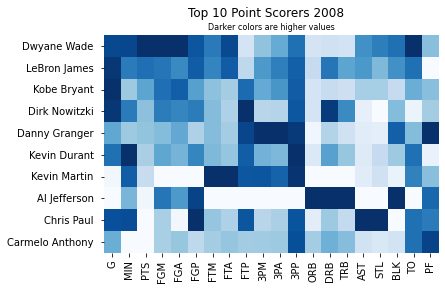

In [12]:
#Plotting the normalized data of the top 10 scores. Dropping the color bar
sns.heatmap(df_norm,yticklabels=df2['Name'],cmap="Blues",cbar=False)
plt.suptitle("Top 10 Point Scorers 2008")
plt.title("Darker colors are higher values", fontsize= 8)
plt.show()

### Spatial Chart

In [13]:
#reading in data
costco_df = pd.read_csv("costcos-geocoded.csv")

In [14]:
costco_df.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [15]:
costco_df.shape

(417, 6)

In [16]:
#importing packages
import geopandas

In [18]:
#Creating a dataframe with shapely object for plotting
gdf = geopandas.GeoDataFrame(
    costco_df, geometry=geopandas.points_from_xy(costco_df.Longitude, costco_df.Latitude))

In [19]:
gdf.head()

,Address,City,State,Zip Code,Latitude,Longitude,geometry
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955,POINT (-86.60096 34.74309)
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420,POINT (-86.81242 33.37765)
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884,POINT (-86.15088 32.36389)
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000,POINT (-134.48300 58.35920)
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217,POINT (-149.88422 61.14327)


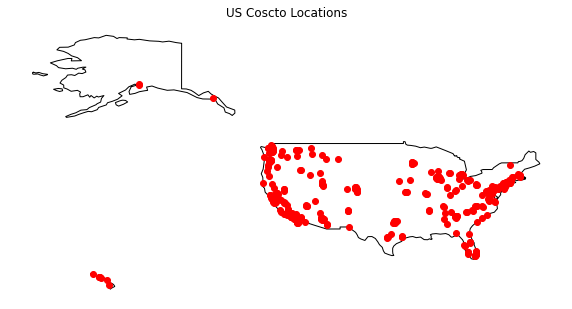

In [31]:
#reading in map to layer over
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

usa = world.loc[world['name'] == 'United States of America'] # getting just USA
boundaries = usa['geometry'] 

# Creating plot details
ax = boundaries.plot(figsize=(10,8),
    color='white', edgecolor='black')

# Plotting geodataframe.
gdf.plot(ax=ax, color='red')
plt.axis('off')
plt.title("US Coscto Locations")
plt.show()

### Contour Chart

I was having a hard time finding a dataset to create a contour plot so I'm creating some data to make one.

In [43]:
from matplotlib import cm

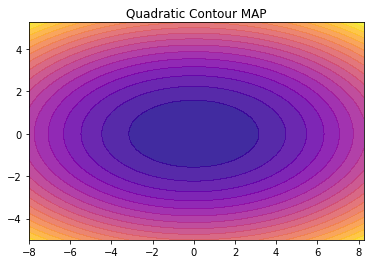

In [53]:
#Creating 2D grid of features
x=np.arange(-8,8.5,0.25)
y=np.arange(-5,5.5,0.25)
X,Y=np.meshgrid(x,y)
Z1 = (X)**2 + 4*(Y)**2
plt.contourf(X,Y,Z1,levels=20,alpha=.85,cmap=cm.plasma)
plt.title("Quadratic Contour MAP")
plt.show()

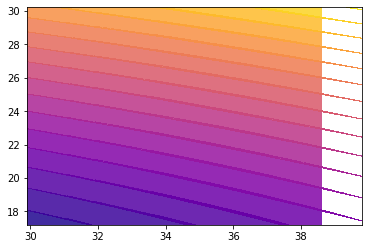

In [51]:
#testing with some of the basekball data
x = df['MIN']
y = df['PTS']

X,Y=np.meshgrid(x,y)
Z1 = (X)**2 + 4*(Y)**2
plt.contourf(X,Y,Z1,levels=20,alpha=.85,cmap=cm.plasma)